<b style='font-size:2em'>Tutorial 1 – Grids and fields</b>

In the first part of the tutorial you will learn how to solve basic partial differential equations using the package <a href="https://github.com/zwicker-group/py-pde">py-pde</a>.

We start by introducing <b>grids</b>, <b>fields</b> and <b>operators</b>. <b>Fields</b> describe the state of the system, e.g. the concentration of a chemical or the temperature. The <b>grid</b> defines the space on which the fields are defined, so on each grid point every field has a defined value. And the <b>operators</b> are functions that can be applied to fields, e.g. gradient operator or laplace operator, and take into account the grid geometry.
    
Afterwards we show how this can be used to solve a diffusion equation for different initial and boundary conditions.

If you have questions regarding the package please ask us or have a look at the documentation <a href="https://py-pde.readthedocs.io/en/latest/">package Documentation</a>.

In [1]:
# This notebook requires py-pde in version 0.17.1 or later
# The package can be obtained from https://github.com/zwicker-group/py-pde
# Alternatively, it can be installed via pip or conda

import pde

# plotting functions
import matplotlib.pyplot as plt
import numpy as np

# Basic grids

We start by defining the space and its discretization. The total space is divided in smaller cells that are equally spaced. The space between two cells is called discretization. The simplest variant is a rectangular geometry with discretization 1 in all dimeensions, which we call a `UnitGrid`. Cells with unequal sizes are supported by the more complex `CartesianGrid`.

The build-in function `grid.plot()` plots the grid without having to extract the data. You get the coordinate arrays of the grid using the `grid.axes_coords` function in the form of two arrays, the first for the x- and the second for the y-direction .

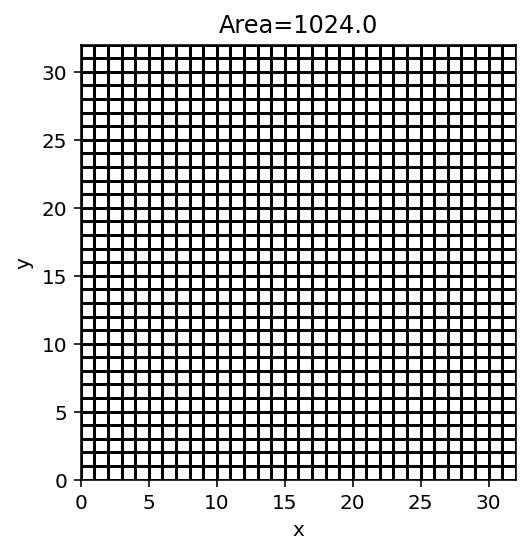

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5]))

In [2]:
grid = pde.UnitGrid([32, 32])
grid.plot(title=f'Area={grid.volume}')
grid.axes_coords

<b>Question:</b> The function `pde.UnitGrid` takes one argument, [32,32]. What is the meaning of this argument?<br>
Change the square into a rectangle with unequal sidelength.<br>

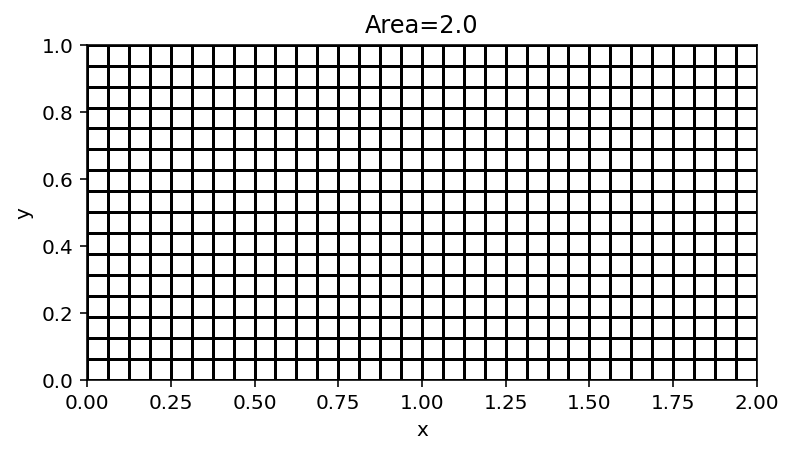

In [3]:
grid = pde.CartesianGrid(bounds=[[0, 2], [0, 1]], shape=[32, 16])
grid.plot(title=f'Area={grid.volume}')

<b>Question:</b> What is the discretization (the sidelength of each grid cell) of this grid in x- and y-direction? Are grid cells necessarily squares?<br>
Use `pde.CartesianGrid?` to get informations about the usage of the function (This works for every function, not only `CartesianGrid`)

Besides rectangular grids, we support a small set of curvilinear (yet still orthogonal) coordinate systems: `PolarSymGrid` on a disk, `SphericalSymGrid` in a ball, and `CylindricalSymGrid` in an axisymmetric cylinder. All these grids have in common that they assume that fields do not depend on the angular variables, i.e., they enforce symmetry.

<b>Question:</b> How many variables are necessary to describe `PolarSymGrid`, `SphericalSymGrid` and `CylindricalSymGrid` when the symmetry discussed above is enforced?

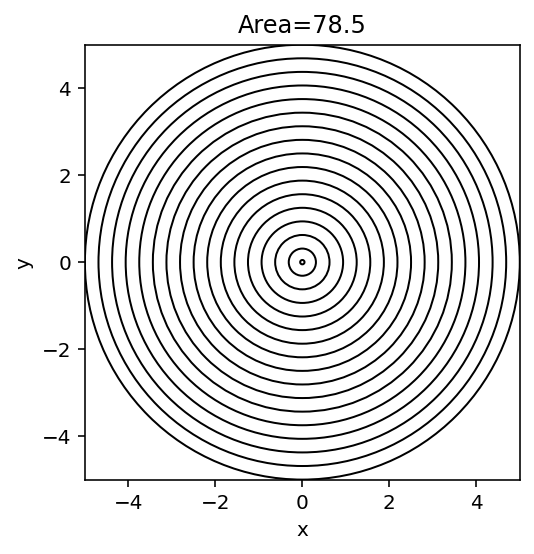

In [4]:
grid = pde.PolarSymGrid(radius=5, shape=16)
grid.plot(title=f'Area={grid.volume:.3g}')

`PolarSymGrid` and `SphericalSymGrid` also support annuli. The two radii can be specified by a supplying a tuple to the `radius` argument.

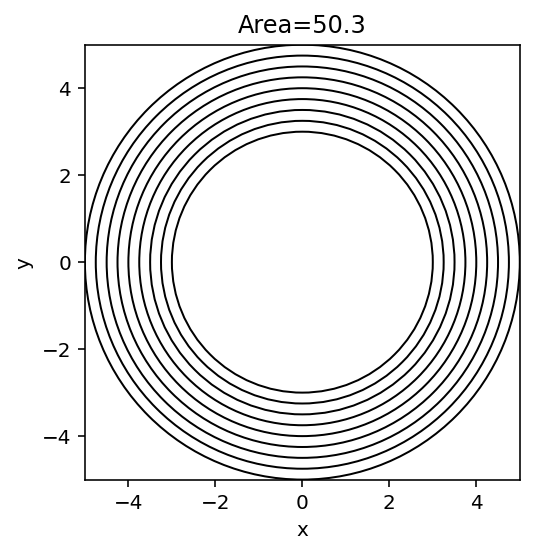

In [5]:
grid = pde.PolarSymGrid(radius=(3, 5), shape=8)
grid.plot(title=f'Area={grid.volume:.3g}')

In [6]:
grid = pde.CylindricalSymGrid(radius=5, bounds_z=[0,16] , shape=[15,16])

<b>Question:</b> How would you plot a grid with cylindrical symmetry?

# Scalar fields
Scalar fields represent scalar quantities that depend on position, e.g. temperature, concentration, or energy. In `py-pde`, scalar fields are represented by their values at each point of the grids introduced above. Consequently, one first has to construct a grid and pass it to the `ScalarField` class to construct a scalar field.

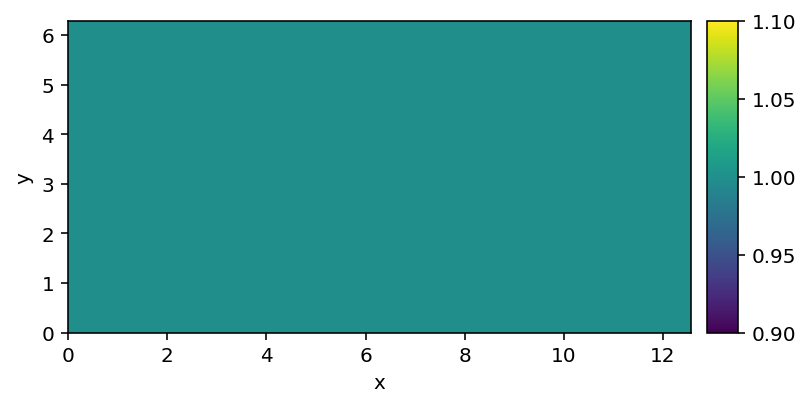

In [7]:
grid = pde.CartesianGrid([[0, 4*np.pi], [0, 2*np.pi]], [128, 32])  # a simpel Cartesian grid

field = pde.ScalarField(grid, data=1)
field.plot();

<b>Question:</b> Define a `ScalarField` on a `PolarSymGrid` and plot it. (Use another name than `grid` for your newly defined `PolarSymGrid`, the `CartesianGrid` will be needed later.)

Scalar fields support a range of mathematical operations and can thus be used roughly like bare `numpy` arrays. The actual underlying data of the field is accessed by its `.data` attribute.<br>
But Scalar fields have more advanced functionalities as well, for example `field.interpolate` uses linear interpolation to calculate the value of a scalar field at points in space that are <b>not</b> lattice points.<br>
And the function `field.average` gives the average value of the field.

In [8]:
field += 4
print(field.data)

print(f'Find the value of the field at point (2.1,0.3) not on the grid:', field.interpolate([2.1, 0.3]))

print(f'Average value of the field: {field.average:.3f}')

[[5. 5. 5. ... 5. 5. 5.]
 [5. 5. 5. ... 5. 5. 5.]
 [5. 5. 5. ... 5. 5. 5.]
 ...
 [5. 5. 5. ... 5. 5. 5.]
 [5. 5. 5. ... 5. 5. 5.]
 [5. 5. 5. ... 5. 5. 5.]]


/Users/dzwicker/user/miniconda3/envs/python3/lib/python3.9/site-packages/numba/core/dispatcher.py:289: UserWarning: Numba extension module 'numba_scipy' failed to load due to 'VersionConflict((scipy 1.7.3 (/Users/dzwicker/user/miniconda3/envs/python3/lib/python3.9/site-packages), Requirement.parse('scipy<=1.6.2,>=0.16')))'.
  entrypoints.init_all()


Find the value of the field at point (2.1,0.3) not on the grid: 5.0
Average value of the field: 5.000


<b>Question</b> As discussed above you can manipulate `field.data` like any `numpy` array. Use this to implement the scalar field $f(x,y)=0.5\cdot x+y$ and plot it.

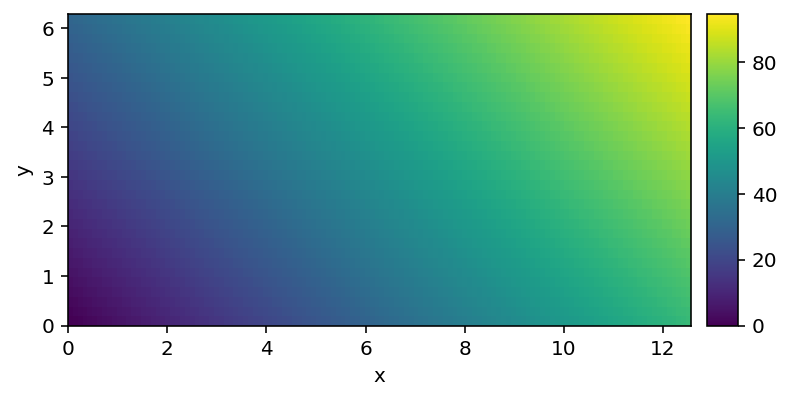

In [9]:
x,y = grid.axes_coords

for i in range(len(x)):
    for j in range(len(y)):
        field.data[i,j] = 0.5*i + j
field.plot();

There are a range of methods to initialize scalar fields. For instance, various random fields can be initiated using the `ScalarField.random_*()` methods. The easiest one, `ScalarField.random_normal(grid, mean, std)` draws uncorrelated random numbers from a Gaussian distribution with mean and standard deviation (std) specified by the respective arguments.

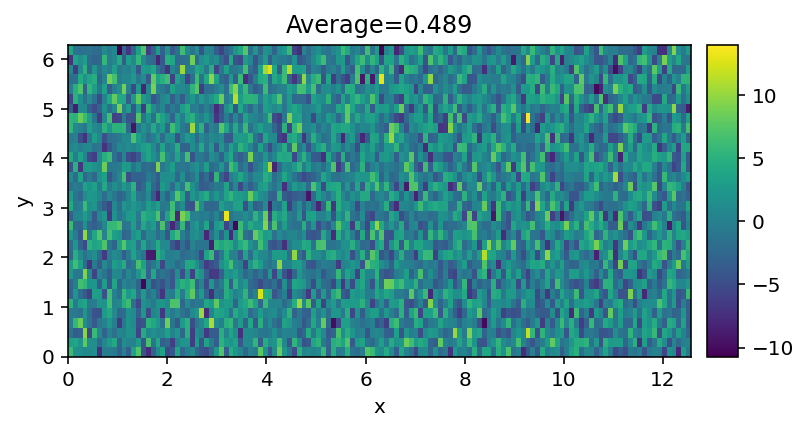

In [10]:
field = pde.ScalarField.random_normal(grid,mean=0.5,std=0.5)
field.plot(title=f'Average={field.average:.3f}', colorbar=True);

Fields can be further analyzed by slicing or projecting them along given axes. Slicing uses interpolation to calculate field values at positions that might not lie on the original grid. In contrast, projecting integrates over the given axes, which are thereby removed.

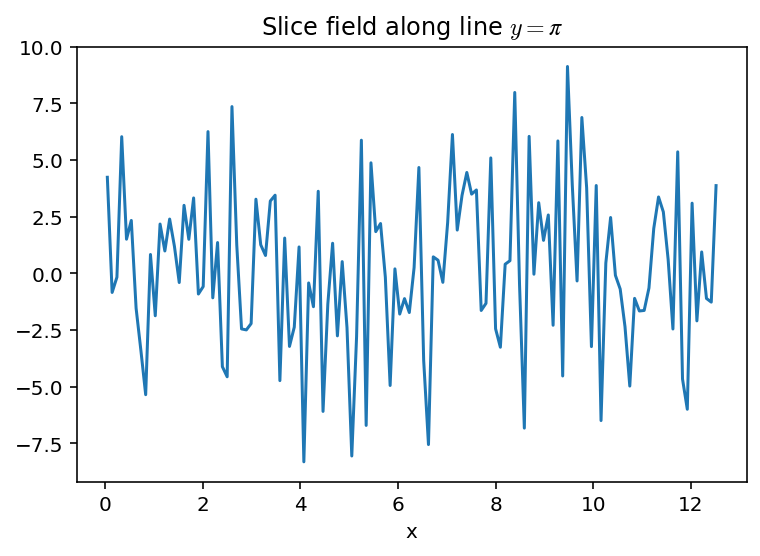

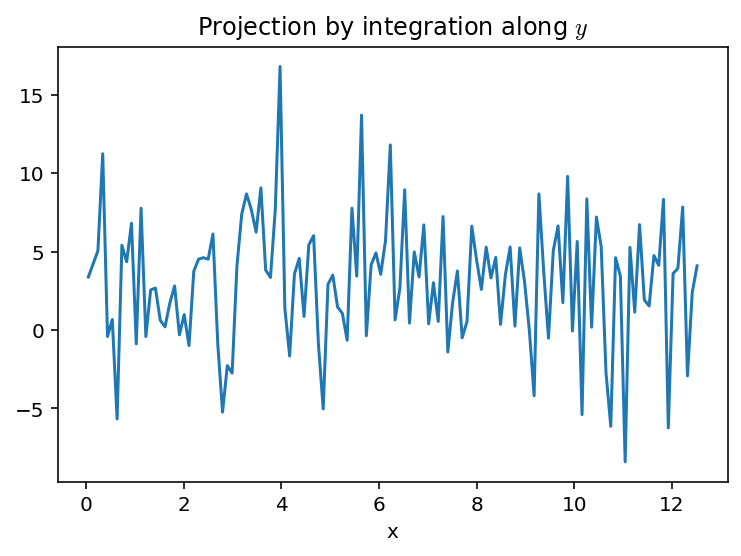

In [11]:
slice_x = field.slice({'y': np.pi})
slice_x.plot(title='Slice field along line $y=π$');

project_x = field.project('y')
project_x.plot(title='Projection by integration along $y$');

Finally, fields can also be created from mathematical expressions that are parsed using the python package `sympy`. Note that this general method is unsafe to process user-supplied data, since it uses the `exec` function.

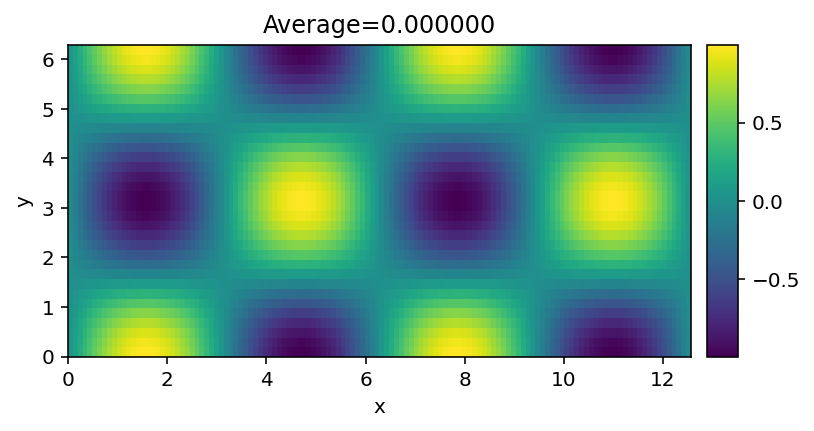

In [12]:
field = pde.ScalarField.from_expression(grid, 'sin(x) * cos(y)')
field.plot(title=f'Average={field.average:f}', colorbar=True);

<b>Question:</b> Use this method to implement $f(x,y)=0.5\cdot x+y$. And try your own function using e.g. exponentials `exp`, etc.

# Field collections
Many partial differential equations combine several fields, which can be represented as a collection.

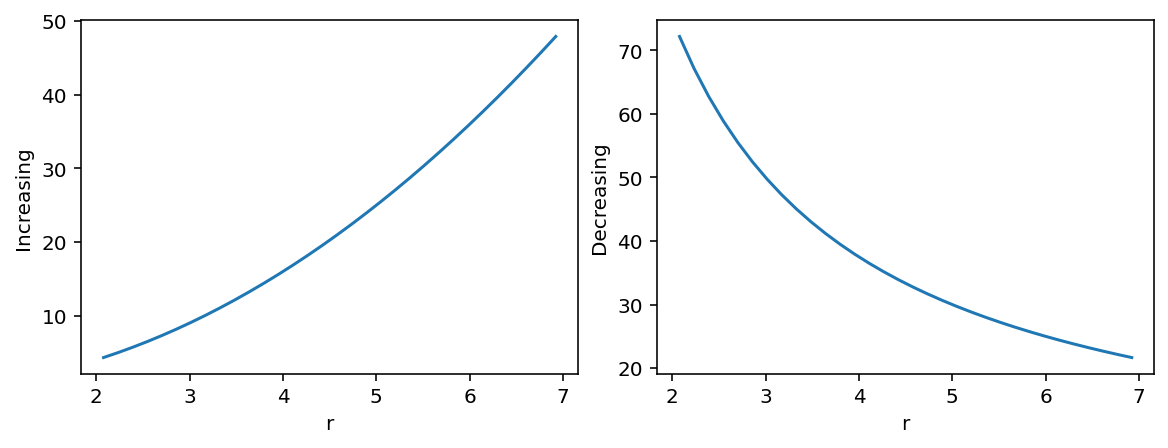

In [13]:
grid_pol = pde.PolarSymGrid(radius=[2, 7], shape=32)
scalar_field1 = pde.ScalarField.from_expression(grid_pol, 'r**2', label='Increasing')
scalar_field2 = pde.ScalarField.from_expression(grid_pol, '150/r', label='Decreasing')
collection = pde.FieldCollection([scalar_field1, scalar_field2])
collection.plot();

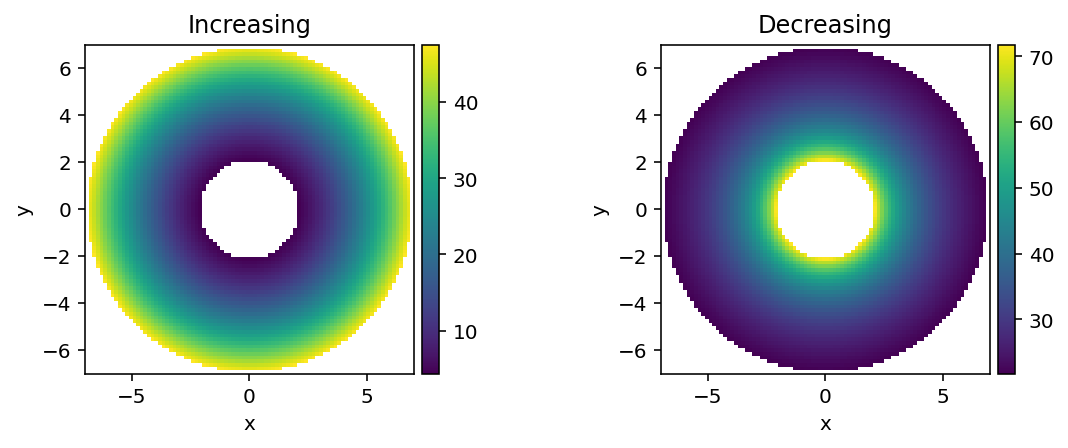

In [14]:
# Plot both fields
collection.plot('image');

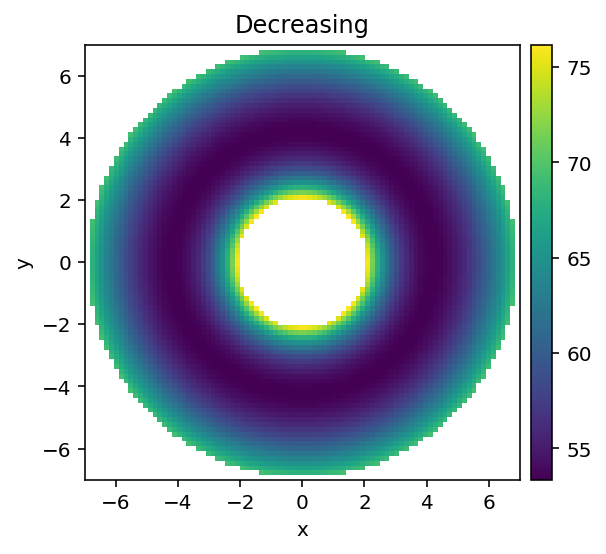

In [15]:
# individual fields in a collection can be accessed using indexing
field_sum = collection[0] + collection[1]
field_sum.plot('image');

# Differential operators for scalar fields
Various differential operators can be applied to fields. These differential operators are just-in-time compiled using the python package `numba`. Consequently, their first evaluation can take quite long, since code needs to be analyzed and compiled. However, each subsequent evaluation will be very fast.

Note that differential operators require boundary conditions to be well-defined. For a 2 dimensional rectengular grid defined by $x\in[0,x_{max}]$ and $y\in[0,y_{max}]$ the boundaries are the lines $x=0,x_{max}$ and $y=0,y_{max}$. Boundary conditions can be specified in a variety of formats, as shown by some examples below. More information on the various formats can be found in <a href="https://py-pde.readthedocs.io/en/latest/packages/pde.grids.boundaries.html#boundary-conditions">the documentation</a>.

We start by applying the laplace operator $\nabla^2 = \partial_x^2 + \partial_y^2$ to the field $f(x,y)=\sin(x)*\cos(y)$ introduced above. First we use periodic boundary conditions, which are defined by $f(0,y)=f(x_{max},y)$ and $f(x,0)=(x,y_{max})$. This means that the space is periodic with a period $x_{max}$ and $y_{max}$.

Note that periodic boundary conditions are a special case, since they also affect how distances are measured in the defined space. Consequently, periodic boundary conditions need to be already declared on the <b>grid</b> instance. While other boundary conditions are defined for the <b>operators</b>

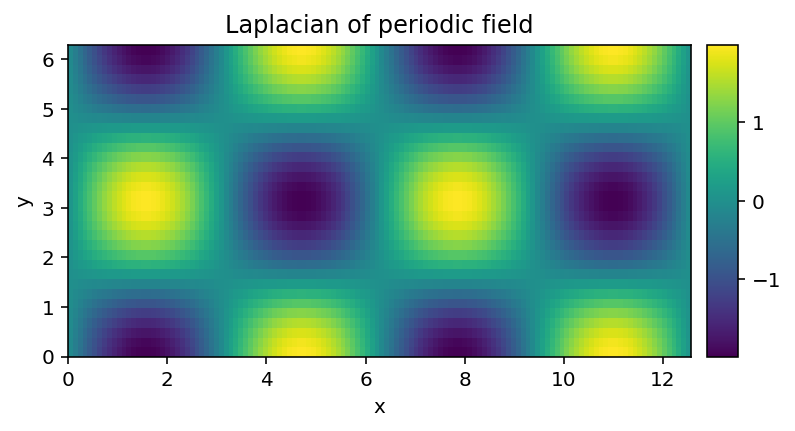

In [16]:
grid_per = pde.CartesianGrid([[0, 4*np.pi], [0, 2*np.pi]], [128, 32], periodic=True)
field_per = pde.ScalarField.from_expression(grid_per, 'sin(x) * cos(y)')
laplace_per = field_per.laplace('periodic')
laplace_per.plot(title='Laplacian of periodic field', colorbar=True);

<b>Question:</b> What is the analytical solution of $\nabla^2[\sin(x)+\cos(y)]$? Do the anlytical and numerical solution coincide?

Next we apply Dirichlet boundary conditions in x- and y-direction. Dirichlet boundary conditions fix the values of the function on the boundary $f(0,y)=a_1,\, f(x_{max},y)=a_2,\, f(x,0)=b_1,\, f(x,y_{max})=b_2$. In the example below the value of $f$ vanishes on all boundaries.

Note that we have to define the `grid` again to make sure it is not `periodic` anymore.

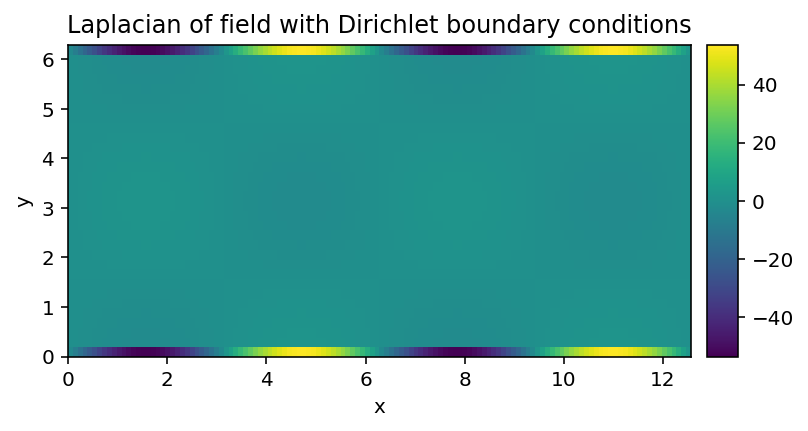

In [17]:
grid = pde.CartesianGrid([[0, 4*np.pi], [0, 2*np.pi]], [128, 32], periodic=False)
field = pde.ScalarField.from_expression(grid, 'sin(x) * cos(y)')

bc_x = ({"value": 0}, {"value": 0})
bc_y = ({"value": 0}, {"value": 0})

laplace_dir = field.laplace(bc=[bc_x, bc_y])
laplace_dir.plot(title='Laplacian of field with Dirichlet boundary conditions', colorbar=True);

The last standard boundary condition is the (von) Neumann boundary condition. Here not the value of the function is specified, but the outwards pointing gradient of the function, which in our case is $-\partial_x f(0,y),\, \partial_x f(x_{max},y),\, -\partial_y f(x,0),\,\partial_y f(x,y_{max})$. In the example we use vanishing derivatives for all boundaries which can be written in a more compact form than the example above.

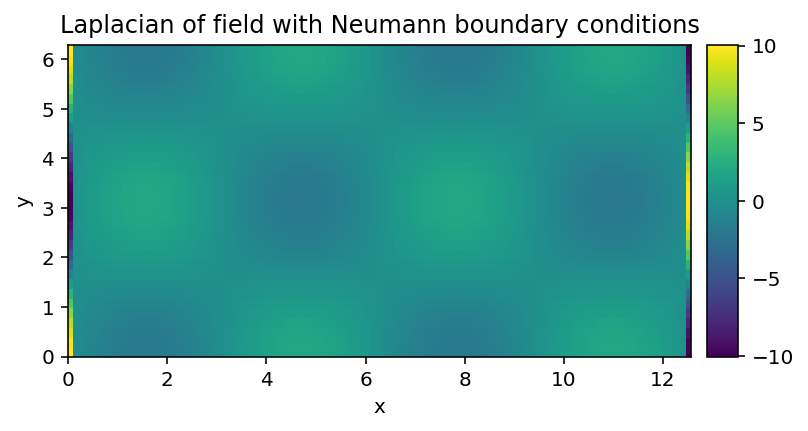

In [18]:
laplace_neu = field.laplace({'derivative': 0})
laplace_neu.plot(title='Laplacian of field with Neumann boundary conditions', colorbar=True);

<b>Question:</b> For Dirichlet conditions the $y$-boundaries take large values and for Neumann conditions the $x$-boundaries take large values. What is the reason for this?<br>
This can be fixed by imposing Dirichlet conditions along the $x$-axis and Neumann conditions along the $y$-axis, why?

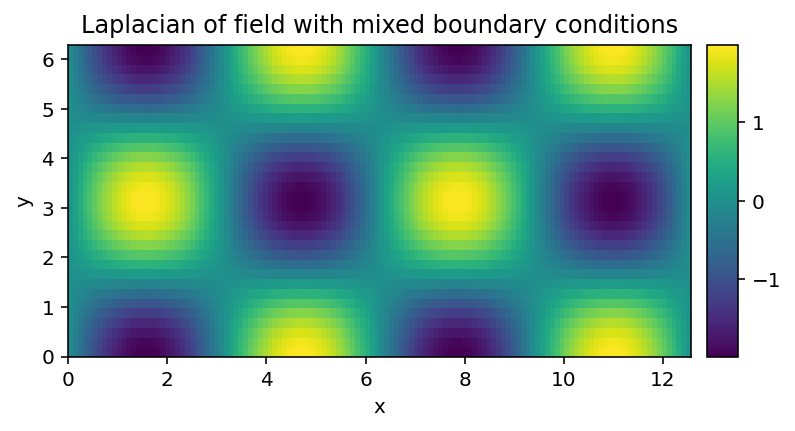

In [19]:
laplace_mix = field.laplace([{'value': 0}, {'derivative': 0}])
laplace_mix.plot(title='Laplacian of field with mixed boundary conditions', colorbar=True);

Periodic and non-periodic axes can also be mixed as in the example below. In this case, the $x$-axis is periodic and thus requires periodic boundary conditions. Conversely, the $y$-axis is non-periodic and any other boundary condition can be specified. The most generic one is a Neumann condition of vanishing derivative. For convenience, we also define `natural` boundary conditions, which indicate periodic conditions for periodic axes and Neumann conditions otherwise.

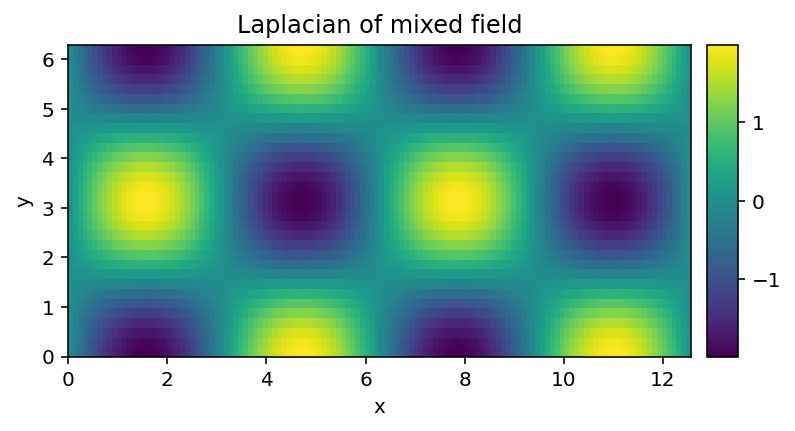

In [20]:
grid_mixed = pde.CartesianGrid([[0, 4*np.pi], [0, 2*np.pi]], [128, 32], periodic=[True, False])
field_mixed = pde.ScalarField.from_expression(grid_mixed, 'sin(x) * cos(y)')

laplace_mixed = field_mixed.laplace(['periodic', {'derivative': 0}])
laplace_mixed.plot(title='Laplacian of mixed field', colorbar=True);

# Solving the diffusion equation
We have introduced <b>scalar fields $f(x,y)$</b> that are defined on <b>grids</b> as well as <b>operators</b> that perform differential operations on those fields subject to <b>boundary conditions</b>. Together with an <b>initial condition</b> $f(x,y,0)$ this framework can be used to describe the time evolution of $f(x,y,t)$ using partial differential equations.

As an example we use the diffusion equation defined by

\begin{equation}
\partial_t f(x,y,t) = D\nabla^2 f(x,y,t)
\;,
\end{equation}

where $D$ is the diffusivity with units length squared over time $[L^2/T]$

For this we use the `pde.PDE` function where we define the time evolution of `f` using a string, in the same way we  initialize fields using `.from_expression`. Thereby the string `laplace(f)` is interpreted as $\nabla^2f$ and `gradient(f)` would be interpreted as $\nabla f$. 

In [29]:
# define PDE with D=1 for field `f` 
eq = pde.PDE({'f': '1 * laplace(f)'})

Next we define the `grid`, `field` and solve the equation for a total time `t_range` using a time step `dt`.

<b>Question:</b> Starting from a `random_normal` initial distribution, what do you expect to happen qualitatively?<br>
Play around with the time step, total time and diffusivity. For large time steps or diffusivities the simulation becomes erroneous, why?

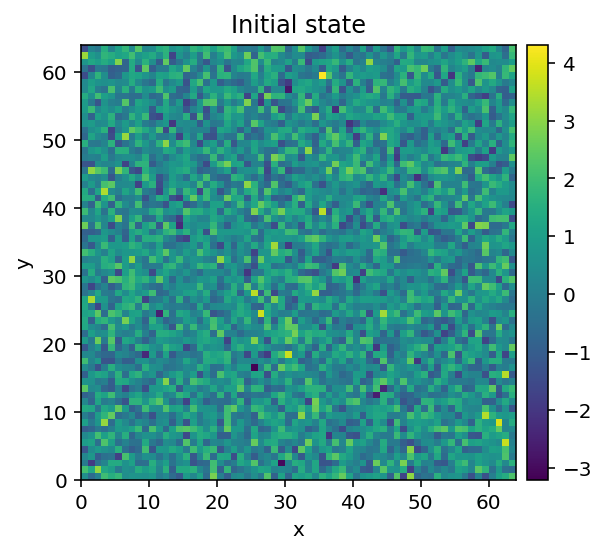

  0%|          | 0/10.0 [00:00<?, ?it/s]

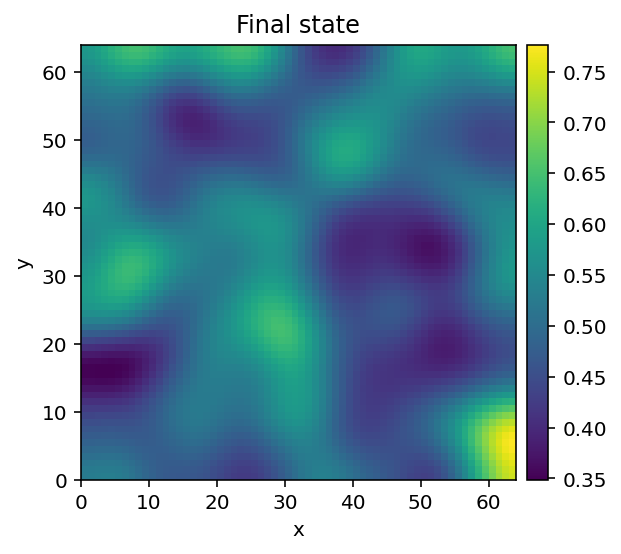

In [22]:
grid = pde.UnitGrid([64, 64])
state = pde.ScalarField.random_normal(grid, mean=0.5, std=1)
state.plot(title='Initial state');

result = eq.solve(state, t_range=10, dt=0.1)
result.plot(title='Final state');

Next we change the initial condition and see how an initially concentrated field smears out over time due to diffusion. The initial condition is a Gaussian $f(x,y,0)=\exp(-((x-x_0)**2+(y-y_0)**2)/\sigma)$ centered at $(x_0,y_0)$ with a width $\sigma$.

<b>Question:</b> How will the final state for $t\rightarrow\infty$ look like? 

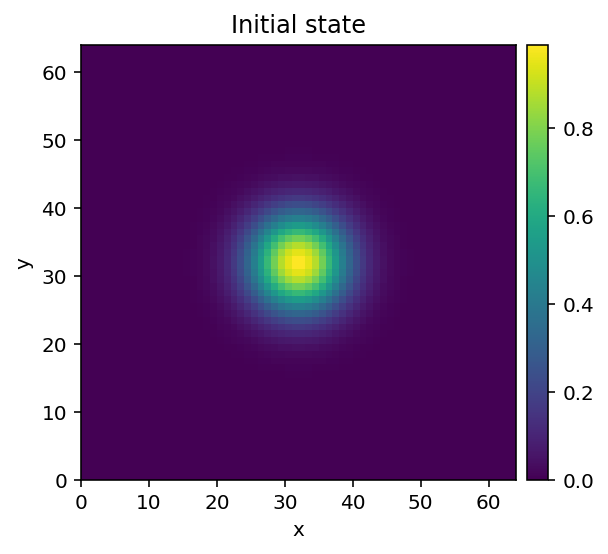

  0%|          | 0/100.0 [00:00<?, ?it/s]

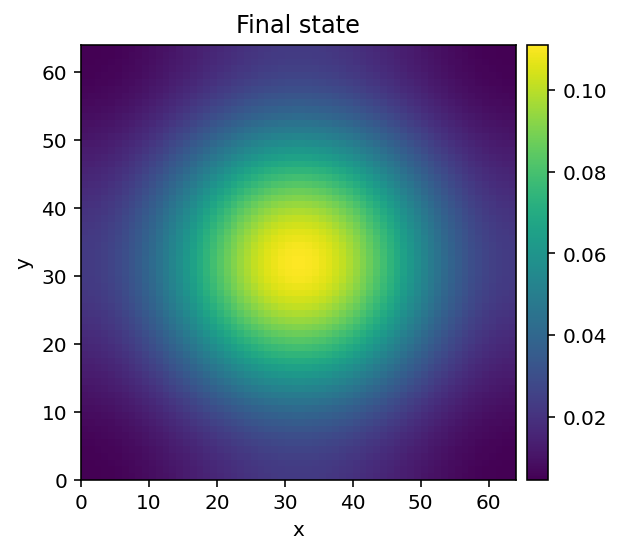

In [23]:
center, width = 32, 50

state = pde.ScalarField.from_expression(grid, f'exp(-((x-{center})**2 + (y-{center})**2)/{width})')
state.plot(title='Initial state');

result = eq.solve(state, t_range=100, dt=0.1)
result.plot(title='Final state');

Finally we can change the boundary conditions from vanishing derivatives (Neumann) conditions to fixed values. As an example we consider a case where the field takes two different fixed values at $x=0$ and $x=x_{max}$ while we keep the Neumann condition for the $y$-direction.

In [24]:
bc_x = ({"value": 0}, {"value": 1})
bc_y = ({'derivative': 0}, {'derivative': 0})

eq_dir = pde.PDE({'f':'laplace(f)'}, bc=[bc_x, bc_y])

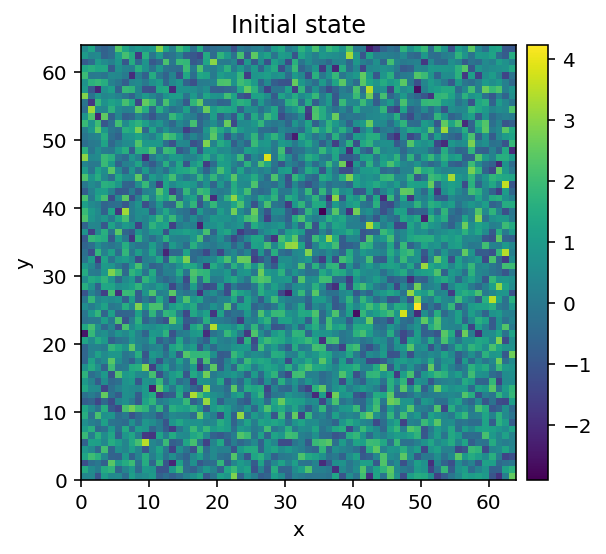

  0%|          | 0/100.0 [00:00<?, ?it/s]

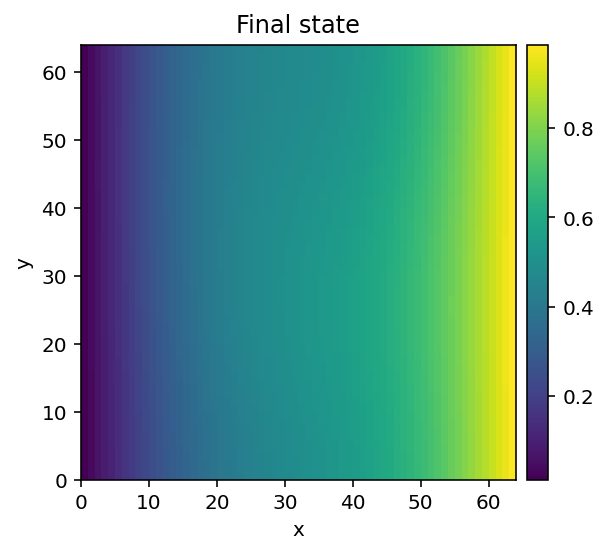

In [25]:
grid = pde.UnitGrid([64, 64], periodic=False)
state = pde.ScalarField.random_normal(grid, mean=0.5, std=1)
state.plot(title='Initial state');

result = eq_dir.solve(state, t_range=100, dt=0.1)
result.plot(title='Final state');

<b>Question:</b> Using the `.slice` and `.project` functions from above, characterize the steady state (long time limit) for these boundary conditions. What changes when you change the values of $f(0,y)$ and $f(x_{max},y)$?

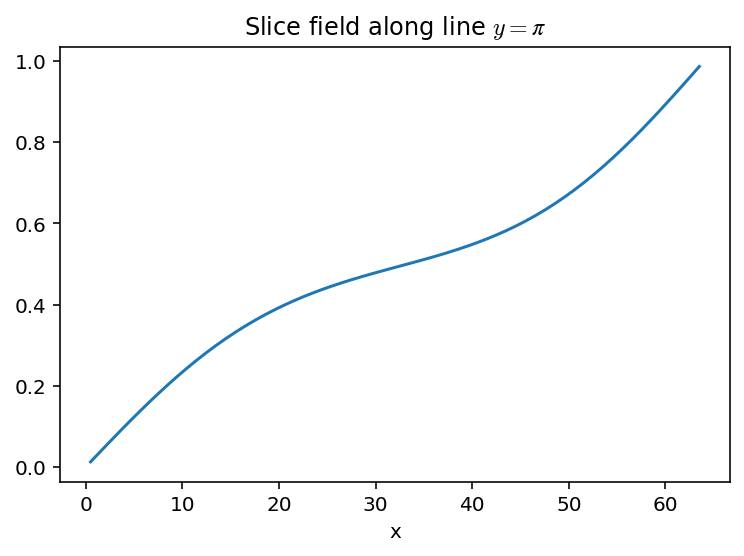

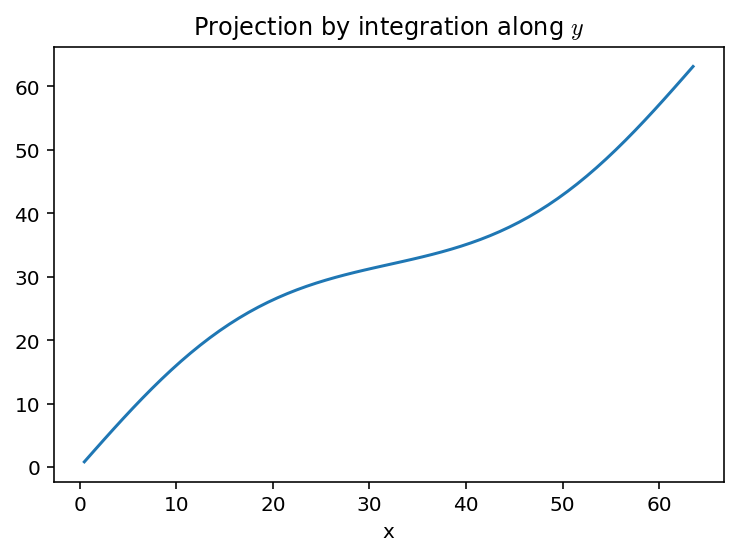

In [26]:
slice_x = result.slice({'y': np.pi})
slice_x.plot(title='Slice field along line $y=π$');

project_x = result.project('y')
project_x.plot(title='Projection by integration along $y$');

## Maybe do this later

Fields can be written to files using the optional `h5py` package to write the data in the Hierarchical Data Format (HDF). Note that the underlying grid is also stored in the file and recreated transparently when the file is read using the `ScalarField.from_file()` method.

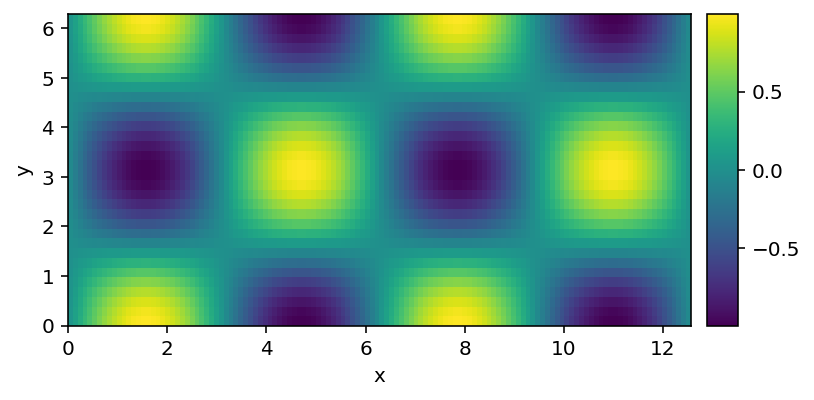

In [27]:
field.to_file('random_field.hdf')

field_loaded = pde.ScalarField.from_file('random_field.hdf')
field_loaded.plot();